In [101]:
!pip install torch

In [102]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'x')

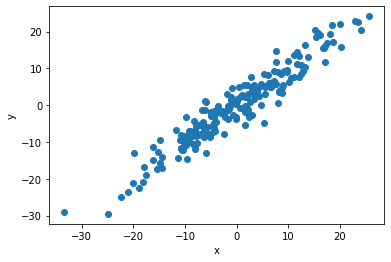

In [103]:
X = torch.randn(200, 1)*10
y = X + 3*torch.randn(200, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [113]:
class Linear_Reg(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [114]:
torch.manual_seed(1)
model = Linear_Reg(1, 1)
print(model)

Linear_Reg(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [106]:
[w, b] = model.parameters()
def get_parameters():
  return (w[0][0].item(), b[0].item())

In [107]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_parameters()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'g')
  plt.scatter(X, y)
  plt.show()

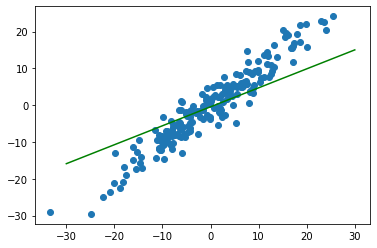

In [108]:
plot_fit('Initial Model')

In [109]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [110]:
epochs = 75
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("epoch:", i, "loss:", loss.item())
  
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 29.849834442138672
epoch: 1 loss: 28.9090518951416
epoch: 2 loss: 27.990280151367188
epoch: 3 loss: 27.09387969970703
epoch: 4 loss: 26.22018051147461
epoch: 5 loss: 25.36949920654297
epoch: 6 loss: 24.5421085357666
epoch: 7 loss: 23.738256454467773
epoch: 8 loss: 22.958148956298828
epoch: 9 loss: 22.20196533203125
epoch: 10 loss: 21.469839096069336
epoch: 11 loss: 20.761865615844727
epoch: 12 loss: 20.078109741210938
epoch: 13 loss: 19.4185848236084
epoch: 14 loss: 18.783266067504883
epoch: 15 loss: 18.172096252441406
epoch: 16 loss: 17.584959030151367
epoch: 17 loss: 17.021711349487305
epoch: 18 loss: 16.482166290283203
epoch: 19 loss: 15.966090202331543
epoch: 20 loss: 15.473210334777832
epoch: 21 loss: 15.003227233886719
epoch: 22 loss: 14.5557861328125
epoch: 23 loss: 14.130500793457031
epoch: 24 loss: 13.726956367492676
epoch: 25 loss: 13.344700813293457
epoch: 26 loss: 12.983248710632324
epoch: 27 loss: 12.642081260681152
epoch: 28 loss: 12.32066535949707
epoch: 2

Text(0.5, 0, 'epoch')

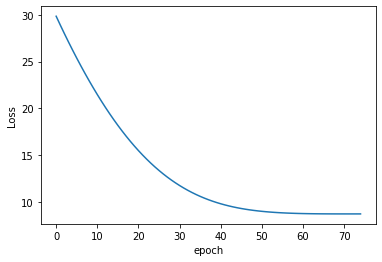

In [111]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

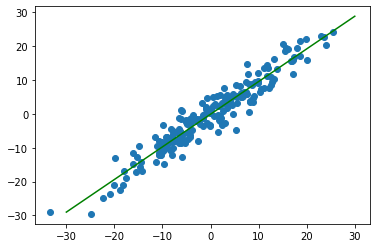

In [112]:
plot_fit("Trained Model")